In [1]:
##python3 -m pip install -U matplotlib
import csv
import matplotlib.pyplot as pyplot
import seaborn as sns
from collections import Counter
import pandas as pd
from operator import itemgetter
from matplotlib.collections import BrokenBarHCollection


In [2]:
## open tsv, read it and open the file to put data in. The source of the data is Flybase
with open("../Data File(s): Genes and Regulation/AllGenes + Locus.tsv")as f:
  data = csv.reader(f, delimiter="\t")
  next(data)
  x = 0 ## to count number of non mitochondrial genes
  y = 0  # count mitochondrial gene
  list1 = []
  c = 0
  z = 0
  q = 0
  checker = []
  #total genes 31640
  
  for row in data:
      if len(row)>5: ## establish the row is of form we want
          if row[0] == "Dmel": ## remove non melanogaster genes
              c= c+1
              del row[0] ## Remove useless rows, index changes
              if row[0].split(":")[0].lower() == "mt": #remove mitochondrial genes
                  y = y + 1
                  continue
              del row[2]
              del row[2]
              if len(row[2]) > 5: # seperate start, end, chrom info, and the row isn't an error row
                  loc = row.pop(2).split(":")
                  chr1 = loc[0]
                  start, endish = [loc[1].split("..")[i] for i in (0,1)]
                  end = endish.split("(")[0]
              row.append(chr1) # add to the row 3 columns
              row.append(start)
              row.append(end)
              list1.append(row)
              x = x + 1

In [3]:
#Generates an intermediate file for clean data
df = pd.DataFrame(list1)
allchrom = ["X","2L", "2R", "3L", "3R", "4"]#, "Y"]
df.to_csv('../Intermediate Files/IntermediateFileForCleanData.csv', index=False)
list2 = []
#quits= []
#plscheck = ['CG8788', 'Sry-alpha']

In [4]:
#Cleans all data so we only get rows we want. Plscheck artificially adds the genes that were removed as duplicates
#but were not real duplicates. The final generated file only has unique loci
with open("../Intermediate Files/IntermediateFileForCleanData.csv")as a:
  data = csv.reader(a)
  next(data)
  for line in data:
      lineclear = list(filter(None, line)) #delete empty columns
      if lineclear[2] in allchrom:
        list2.append(lineclear)
        z = z+1
        '''
          if (lineclear[2],lineclear[3],lineclear[4]) in checker: #removes duplicates
              z = z +1
              if lineclear[0] in plscheck: #adds wrong duplicates back in
                  list2.append(lineclear)
              else:
                  continue
          else:
              checker.append((lineclear[2],lineclear[3], lineclear[4]))
              list2.append(lineclear)
        '''
      else:
          q = q+1
df = pd.DataFrame(list2)
df.to_csv('../Intermediate Files/Final Clean Data for Genes.csv', index=False)

In [5]:
print(x) #non mt
print(y) #mt
print(c) #all melanogaster
print(z) #in cleaned file
print(q) #removed due to weird chromosome info, or data from Y chromosome
print(len(list2)) #genes finally in the file

31601
39
31640
31402
199
31402


In [6]:
x = 0
y = 0
z = 0
q = 0

genes = {}
##Gets CRM info. Raw file from Redfly
with open("../Data File(s): Genes and Regulation/CRM_raw.txt")as f:
  data = csv.reader(f)
  next(data)
  
  for row in data:
          if len(row)>5:
                  if row[0].split("_")[0].lower() == "unspecified": #Gets rid of CRM with unspecified trans sections
                      x = x+1
                  else:
                      y = y+1
                      genename = row[0].split("_")[0]
                      if genename in genes:
                          genes[genename] = genes[genename] + 1 #gets the CRM per gene
                      elif genename not in genes:
                          genes[genename] = 1

In [7]:
ll = 0
same = []
notsame = []
similar = [[],[],[],[],[],[],[]]
checker = []
others= [[],[],[],[],[],[],[]]

#This code cross references everything. Each chromosome is assigned its own list inside similar and others. Similar
#0 has the Cis modules from Chr 1, index 2 from chrom 2 etc..
with open("../Intermediate Files/Final Clean Data for Genes.csv")as a:
  data = csv.reader(a)
  next(data)
  for line in data:
      ll = ll+1 #total number of lines in new code
      lineclear = list(filter(None, line))
##      if (lineclear[2],lineclear[3], lineclear[4]) in checher:
##              z = z +1
##              continue
##      else:
##              checker.append((lineclear[2],lineclear[3], lineclear[4]))
      if lineclear[0] in genes.keys():
          q = q+1
          same.append(lineclear[0]) #list of regulated genes
          start = int(lineclear[3])
          stop = int(lineclear[4])
          width = stop - start
          if lineclear[2] == "X":
              if start >= 21542271: ##We add the basepair correction for the centromere
                      start = start+ 50000
              similar[0].append((start, width))
          elif lineclear[2] == "2L":
              similar[1].append((start, width))
          elif lineclear[2] == "2R":
              start = start+23513712+30000 ##We add the basepair correction for the centromere
              similar[1].append((start, width))
          elif lineclear[2] == "3L":
              similar[2].append((start, width))
          elif lineclear[2] == "3R":
              start = start+28110227+100000 ##We add the basepair correction for the centromere
              similar[2].append((start, width))
          elif lineclear[2] == "4":
              start = start+100000 ##We add the basepair correction for the centromere
              similar[3].append((start, width))
          elif lineclear[2] == "Y":
              similar[4].append((start, width))
      else:
          #same.append(lineclear[0])
          notsame.append(lineclear[0]) #list of nonregulated genes
          start = int(lineclear[3])
          stop = int(lineclear[4])
          width = stop - start
          if lineclear[2] == "X":
              if start >= 21542271: ##We add the basepair correction for the centromere
                      start = start+ 50000
              others[0].append((start, width))
          elif lineclear[2] == "2L":
              others[1].append((start, width))
          elif lineclear[2] == "2R":
              start = start+23513712+30000 ##We add the basepair correction for the centromere
              others[1].append((start, width))
          elif lineclear[2] == "3L":
              others[2].append((start, width))
          elif lineclear[2] == "3R":
              start = start+28110227+100000 ##We add the basepair correction for the centromere
              others[2].append((start, width))
          elif lineclear[2] == "4":
              start = start+100000 ##We add the basepair correction for the centromere
              others[3].append((start, width))
          elif lineclear[2] == "Y":
              others[4].append((start, width))


In [9]:
#This gives us top max N values
##N = 30        
##res = dict(sorted(genes.items(), key = itemgetter(1), reverse = True)[:N])
##print (res)

#This told us the differences between the commonalities we found and all the genes that had CRM's
##print (genes)
##keys = []
##for i in genes.keys():
##    keys.append(i)
##differences = set(keys) - set(same)
##print (differences)

#If these first three counts were equal, it meant all genes with CRMS had a match in the  all genes file, a sanity check
print (q) #matched genes to a locus
print (len(genes)) #all genes with CRMS
print(len(same)) #all regulated genes
print(len(notsame))
print(ll) #total rows in file i.e genes in chromosome that are not Y-chromosome

1648
1648
1648
29754
31402


In [11]:
reggenes = pd.DataFrame(same)
nonreggenes = pd.DataFrame(notsame)

In [ ]:
#optional chunk to write to csv
reggenes.to_csv("drosophila_reggenes.csv", header = False, index = False)
nonreggenes.to_csv("drosophila_nonreggenes.csv", header = False, index = False)

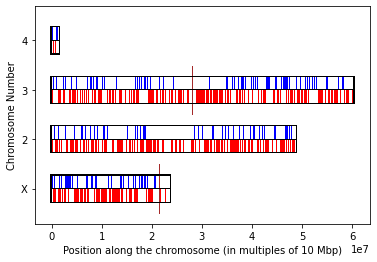

In [12]:
fig = pyplot.figure()
ax = fig.add_subplot(111)

#Define the edges and staring/ending points of the chromosomes along with their sizes
yticklabels = []
yticks = []
yranges = [[20,5],[40,5],[60,5], [80,5],[100,5], [120,5], [140,5]]
yranges2 = [[25.5,5],[45.5,5],[65.5,5], [85.5,5],[105.5,5], [125.5,5], [145.5,5]]
beginner = (-250000,250000)
edge = [(23542271+50000,250000), (23513712+30000+25286936,250000),(28110227+100000+32079331,250000),(1348131+100000,250000), (367352,250000)]
lengths = [(0,23542271+50000), (0,23513712+30000+25286936), (0,28110227+100000+32079331),(0,1348131+100000),(0,367352)]
bottoms = [19.5, 39.5, 59.5, 79.5, 99.5, 119.5, 139.5]
bottoms2 = [25,45,65,85,105,125,145]
tops = [25,45,65,85,105,125,145]
tops2 = [30.5,50.5,70.5,90.5,110.5,130.5,150.5]

#Plot the data. BrokenbarHcollection (matplotlib) takes inputs in the form of [(start,length), (start, length)...] for
#both x and y.
for i in range(0,4):
    coll = BrokenBarHCollection(similar[i], yranges2[i], facecolor="blue", zorder= 1)
    ax.add_collection(coll)
for i in range(0,4):
    coll = BrokenBarHCollection(others[i], yranges[i], facecolor="red", zorder = 0.75)
    ax.add_collection(coll)

widthbox = 0.5
heightbox = 6
#This chunk plots the edges and ends of the chromosome, essentially everything in black
for i in range(0,4):
    col2 = BrokenBarHCollection([lengths[i]], [bottoms[i],widthbox], facecolor="black")
    col3 = BrokenBarHCollection([lengths[i]], [tops[i],widthbox], facecolor="black")
    col4 = BrokenBarHCollection([beginner,edge[i]], [bottoms[i],heightbox], facecolor="black")
    col5 = BrokenBarHCollection([lengths[i]], [bottoms2[i],widthbox], facecolor="black")
    col6 = BrokenBarHCollection([lengths[i]], [tops2[i],widthbox], facecolor="black")
    col7 = BrokenBarHCollection([beginner,edge[i]], [bottoms2[i],heightbox], facecolor="black")
    center = bottoms[i]+5.75
    yticks.append(center)
    ax.add_collection(col2)
    ax.add_collection(col3)
    ax.add_collection(col4)
    ax.add_collection(col5)
    ax.add_collection(col6)
    ax.add_collection(col7)

#Sets the labels
labeler = ["X", "2", "3", "4"]#, "Y"]
for a in labeler:
    yticklabels.append(a)

#individually adds the locations and sizes of the centromeres
col23 = BrokenBarHCollection([(21542271,50000)], [15,20], facecolor="brown", zorder = 0.5) #[15,15]
col24 = BrokenBarHCollection([(0,100000)], [75,20], facecolor="brown", zorder = 0.5)
col11 = BrokenBarHCollection([(23513712,30000)], [35,20], facecolor="brown", zorder = 0.5)
col22 = BrokenBarHCollection([(28110227,100000)], [55,20], facecolor="brown", zorder = 0.5)
ax.add_collection(col11)
ax.add_collection(col23)
ax.add_collection(col24)
ax.add_collection(col22)


#basically plots and sets some final parameters to improve viewability
ax.set_yticks(yticks)
ax.set_yticklabels(yticklabels)
ax.axis('tight')
pyplot.ylabel("Chromosome Number")
pyplot.xlabel("Position along the chromosome (in multiples of 10 Mbp)")
pyplot.savefig('../Drosophila.pdf') 
pyplot.show()